In [1]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import importlib
import warnings

warnings.filterwarnings('ignore')
from tensorflow.keras.models import load_model

import Model
import utils
import config
#importlib.reload(Model)

def adaptation_transfer_learning_with_small_samples(path, classes, best_model, set_epoch, set_batch_size,
                                                    X_test_prev_all, y_test_prev_all, Model_name,
                                                    train_ratio, set_verbose, save_model_set, show_class_distribution):

    feature_set, labels = utils.get_dataset(path, classes, show_labels=show_class_distribution)
    X_train, y_train, X_test, y_test = utils.split_data(feature_set, labels, train_ratio)
    #print(f"Shapes  =>  X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

    init_test_loss, init_test_acc = best_model.evaluate(X_test, y_test, verbose=0)
    print(f"\n Unseen session performance\n"
          f"Loss: {np.round(init_test_loss, 4)}, Acc: {np.round(init_test_acc, 4)*100}%")

    print(f"\n After adaptation (Transfer learning with small samples)")

    history, get_model = Model.Train_model(best_model, X_train, y_train, X_test, y_test,
                                set_epoch, set_batch_size, Model_name, set_verbose, save_model_set)
    utils.visualize_history(history)
    print(X_test_prev_all.shape, y_test_prev_all.shape, X_test.shape, y_test.shape)

    X_test_prev_all = np.concatenate((X_test_prev_all, X_test), axis=0)
    y_test_prev_all = np.concatenate((y_test_prev_all, y_test), axis=0)

    prev_acc = get_model.evaluate(X_test_prev_all, y_test_prev_all, verbose=0)[1]

    maximum_test_acc = np.max(history.history['val_accuracy'])

    difference = np.round((maximum_test_acc - init_test_acc)*100, 2)
    print(f"Accuracy Difference (Initial accuracy before training - max test accuracy after training): {difference}%")

    if difference > 0:
        print(f"\t ===>  Positive - (Indicates that the performance have improved)")
    elif difference < 0:
        print(f"\t ===>  Negative - (Indicates that the performance have decreased)")

    return [init_test_acc, prev_acc, float(maximum_test_acc)], X_test_prev_all, y_test_prev_all


Dataset 1/18 - Session Exp_2025-05-27/E8331D05289A/

Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 85.71%
Maximum validation accuracy : 92.77%
Dataset 2/18 - Session Exp_2025-06-18/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.5345, Acc: 83.65%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 78.26%
Maximum validation accuracy : 83.55%


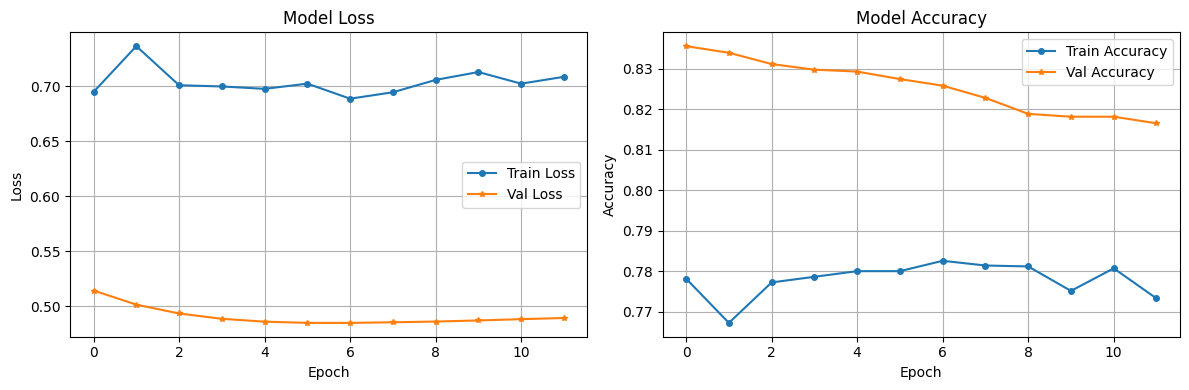

(4313, 4, 14, 1) (4313,) (4311, 4, 14, 1) (4311,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): -0.09%
	 ===>  Negative - (Indicates that the performance have decreased)
Dataset 3/18 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.6434, Acc: 73.92%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 72.45%
Maximum validation accuracy : 77.08%


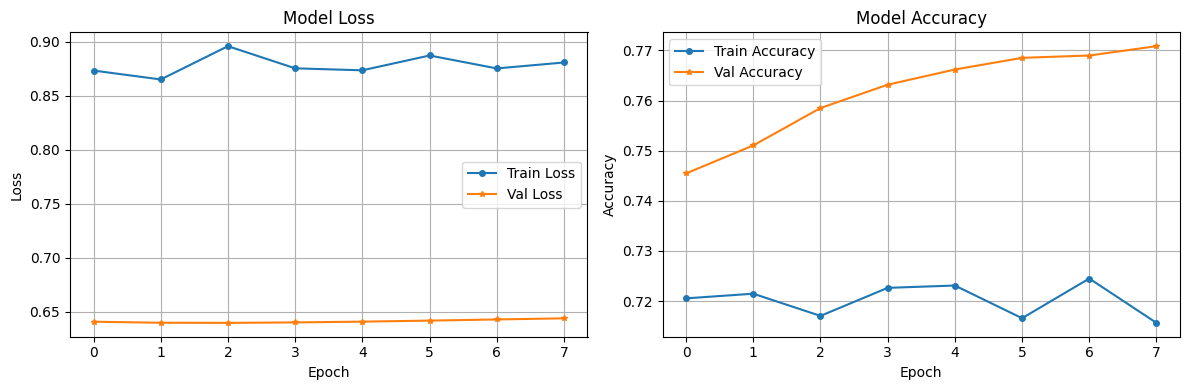

(8624, 4, 14, 1) (8624,) (4294, 4, 14, 1) (4294,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): 3.17%
	 ===>  Positive - (Indicates that the performance have improved)
Dataset 4/18 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.4835, Acc: 82.87%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 79.12%
Maximum validation accuracy : 87.07%


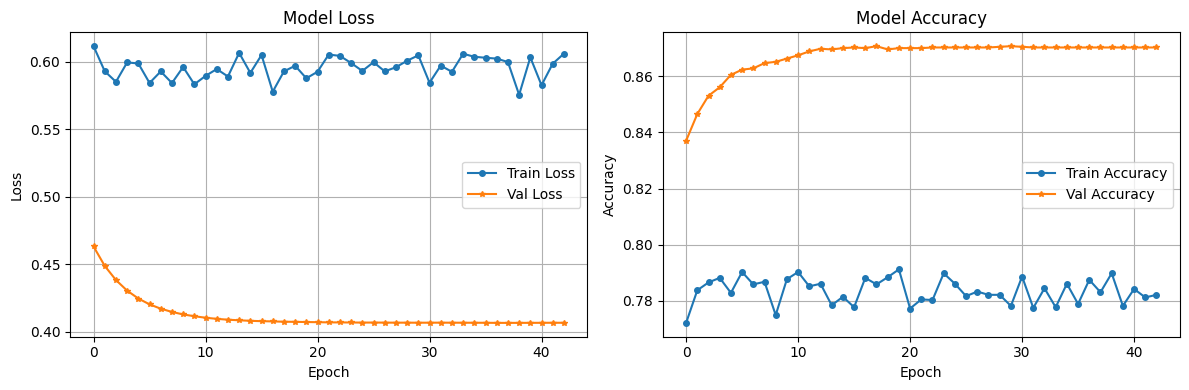

(12918, 4, 14, 1) (12918,) (4307, 4, 14, 1) (4307,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): 4.2%
	 ===>  Positive - (Indicates that the performance have improved)
Dataset 5/18 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.5104, Acc: 81.63%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 77.68%
Maximum validation accuracy : 84.93%


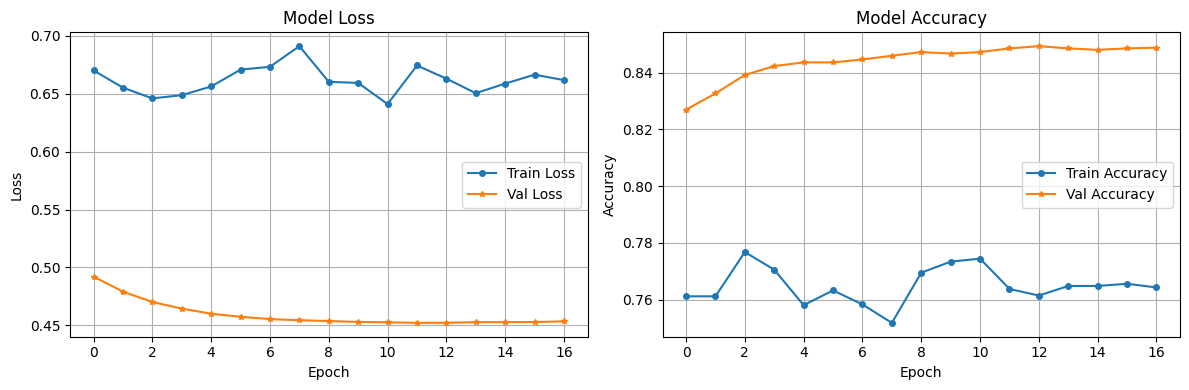

(17225, 4, 14, 1) (17225,) (3843, 4, 14, 1) (3843,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): 3.3%
	 ===>  Positive - (Indicates that the performance have improved)
Dataset 6/18 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/


 Unseen session performance
Loss: 1.1058, Acc: 67.21000000000001%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 65.87%
Maximum validation accuracy : 69.13%


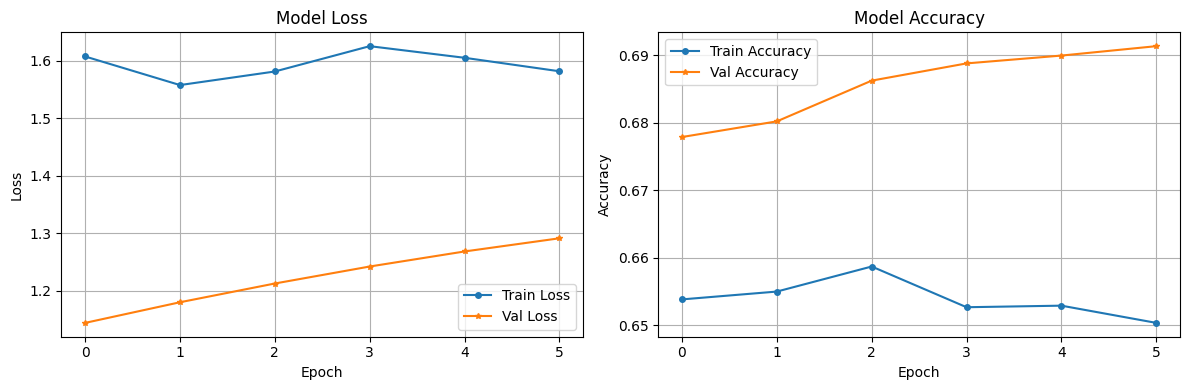

(21068, 4, 14, 1) (21068,) (4315, 4, 14, 1) (4315,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): 1.92%
	 ===>  Positive - (Indicates that the performance have improved)
Dataset 7/18 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.8784, Acc: 72.25%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 68.34%
Maximum validation accuracy : 71.8%


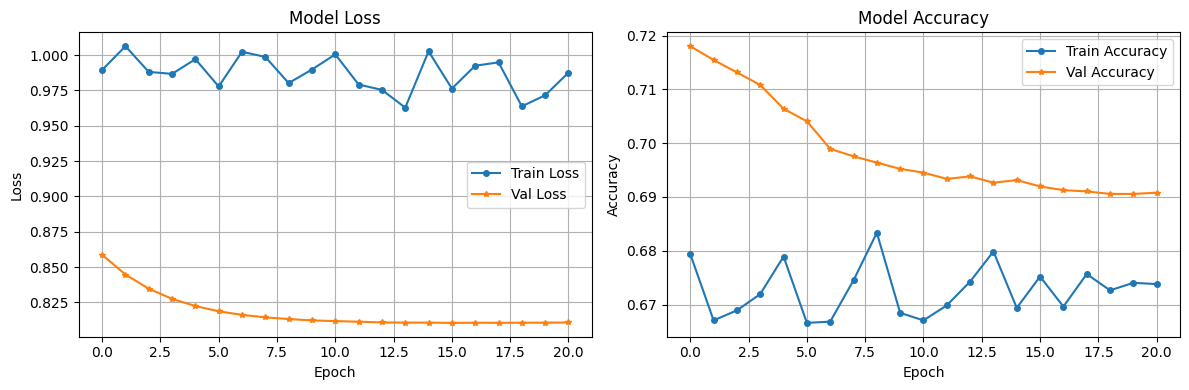

(25383, 4, 14, 1) (25383,) (4295, 4, 14, 1) (4295,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): -0.44%
	 ===>  Negative - (Indicates that the performance have decreased)
Dataset 8/18 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.6522, Acc: 74.47%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 73.67%
Maximum validation accuracy : 76.03%


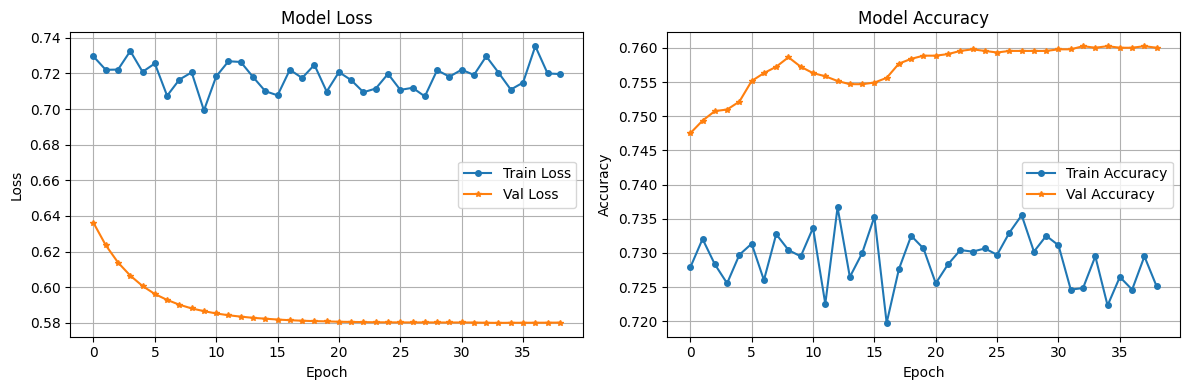

(29678, 4, 14, 1) (29678,) (4317, 4, 14, 1) (4317,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): 1.55%
	 ===>  Positive - (Indicates that the performance have improved)
Dataset 9/18 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.8007, Acc: 69.69%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 68.34%
Maximum validation accuracy : 70.13%


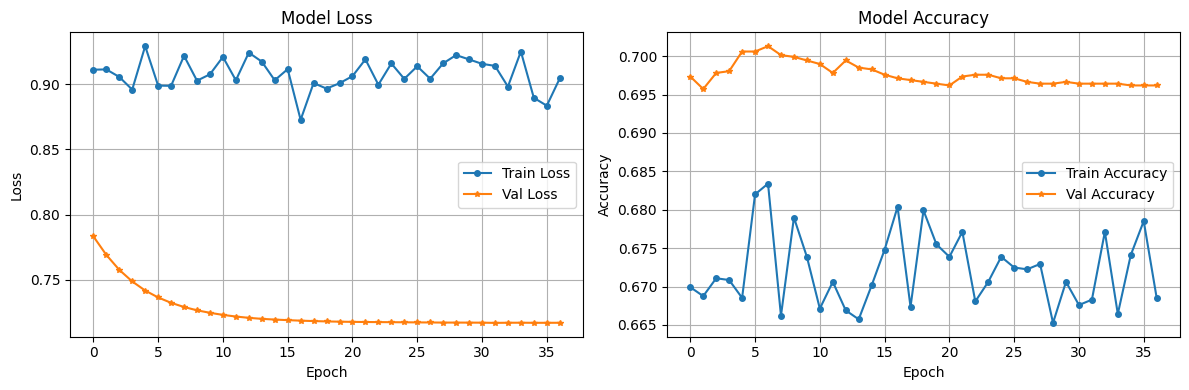

(33995, 4, 14, 1) (33995,) (4302, 4, 14, 1) (4302,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): 0.44%
	 ===>  Positive - (Indicates that the performance have improved)
Dataset 10/18 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.7955, Acc: 68.96%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 66.34%
Maximum validation accuracy : 68.59%


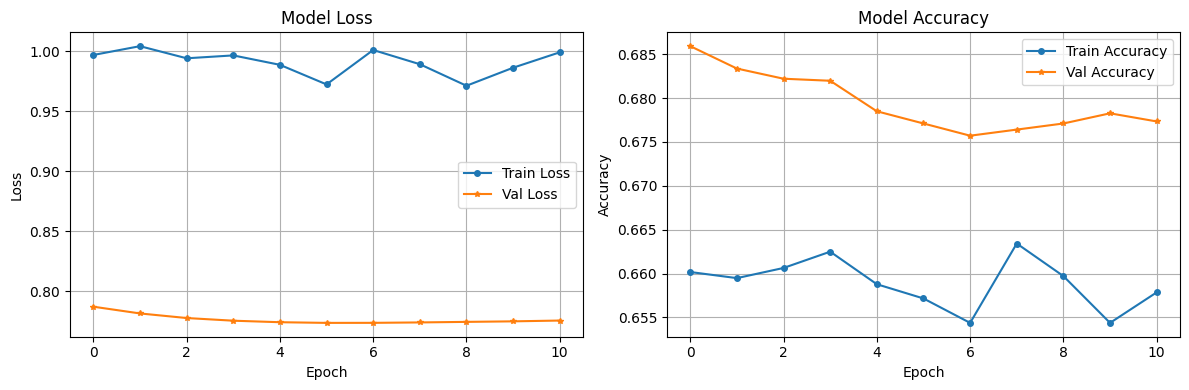

(38297, 4, 14, 1) (38297,) (4311, 4, 14, 1) (4311,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): -0.37%
	 ===>  Negative - (Indicates that the performance have decreased)
Dataset 11/18 - Session Exp_2025-06-23-v1/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.7526, Acc: 73.39%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 69.56%
Maximum validation accuracy : 73.28%


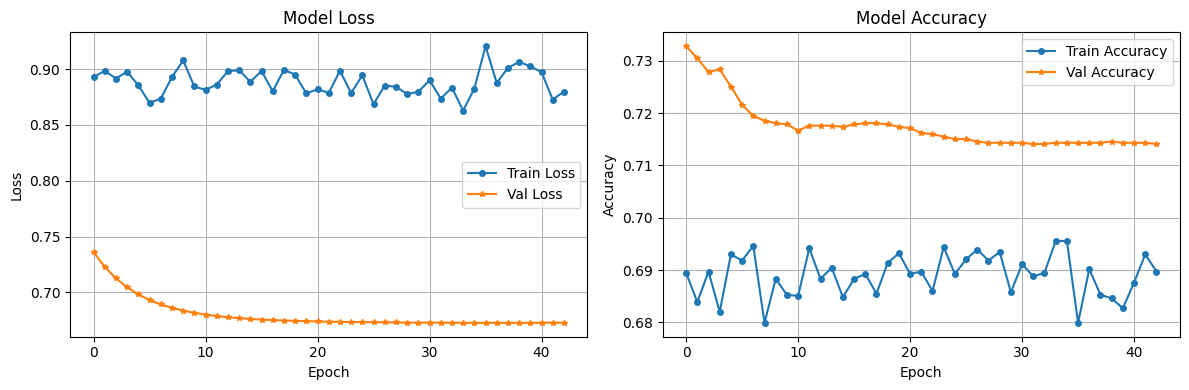

(42608, 4, 14, 1) (42608,) (4281, 4, 14, 1) (4281,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): -0.12%
	 ===>  Negative - (Indicates that the performance have decreased)
Dataset 12/18 - Session Exp_2025-06-23-v2/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.8399, Acc: 67.83%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 69.32%
Maximum validation accuracy : 71.15%


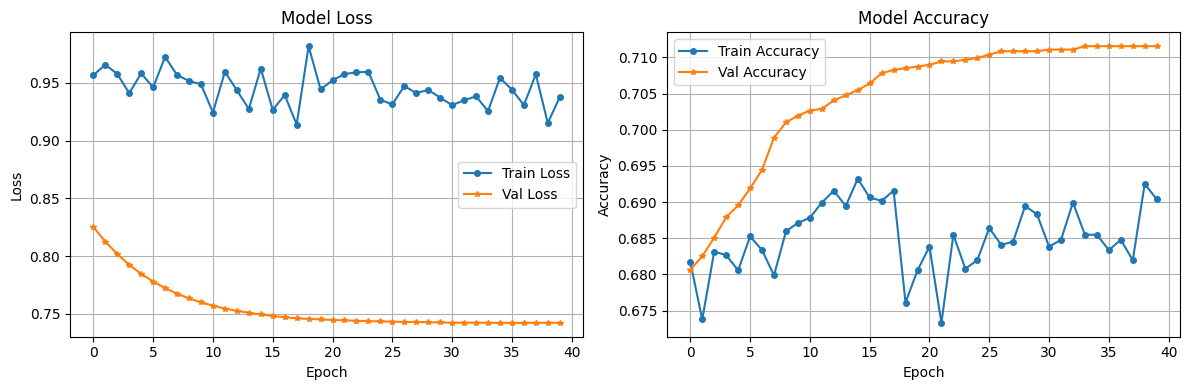

(46889, 4, 14, 1) (46889,) (4271, 4, 14, 1) (4271,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): 3.32%
	 ===>  Positive - (Indicates that the performance have improved)
Dataset 13/18 - Session Exp_2025-06-23-v3/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.6958, Acc: 70.61%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 69.78%
Maximum validation accuracy : 71.38%


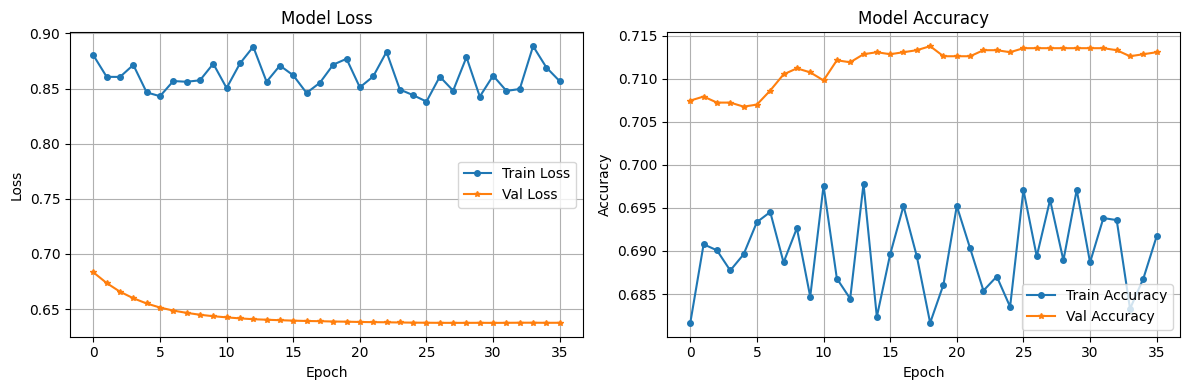

(51160, 4, 14, 1) (51160,) (4273, 4, 14, 1) (4273,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): 0.77%
	 ===>  Positive - (Indicates that the performance have improved)
Dataset 14/18 - Session Exp_2025-06-23-v4/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.726, Acc: 71.81%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 69.36%
Maximum validation accuracy : 71.79%


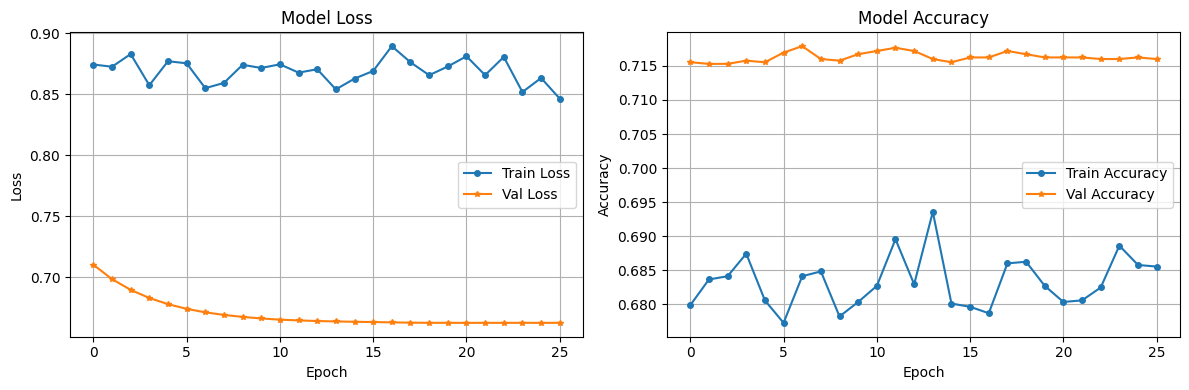

(55433, 4, 14, 1) (55433,) (4236, 4, 14, 1) (4236,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): -0.02%
	 ===>  Negative - (Indicates that the performance have decreased)
Dataset 15/18 - Session Exp_2025-06-24-v4/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.4633, Acc: 81.6%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 78.02%
Maximum validation accuracy : 81.77%


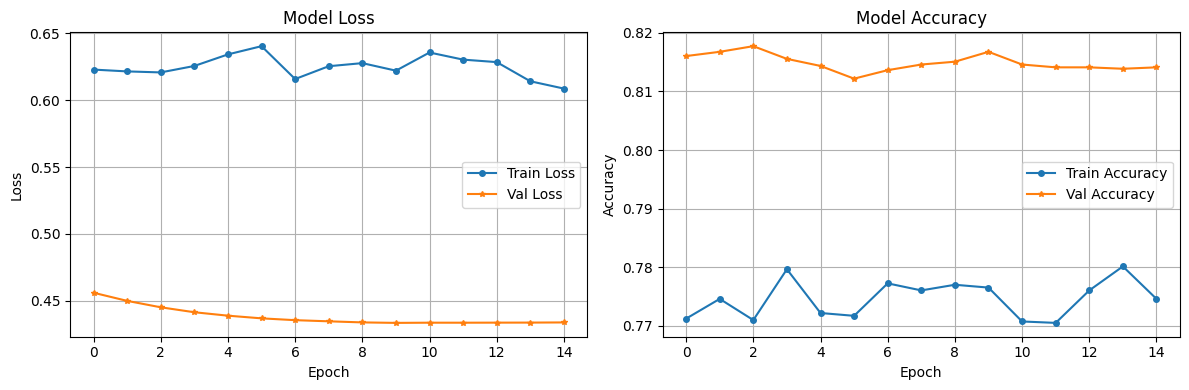

(59669, 4, 14, 1) (59669,) (4153, 4, 14, 1) (4153,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): 0.17%
	 ===>  Positive - (Indicates that the performance have improved)
Dataset 16/18 - Session Exp_2025-06-24-v4/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.4471, Acc: 82.3%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 77.73%
Maximum validation accuracy : 82.78%


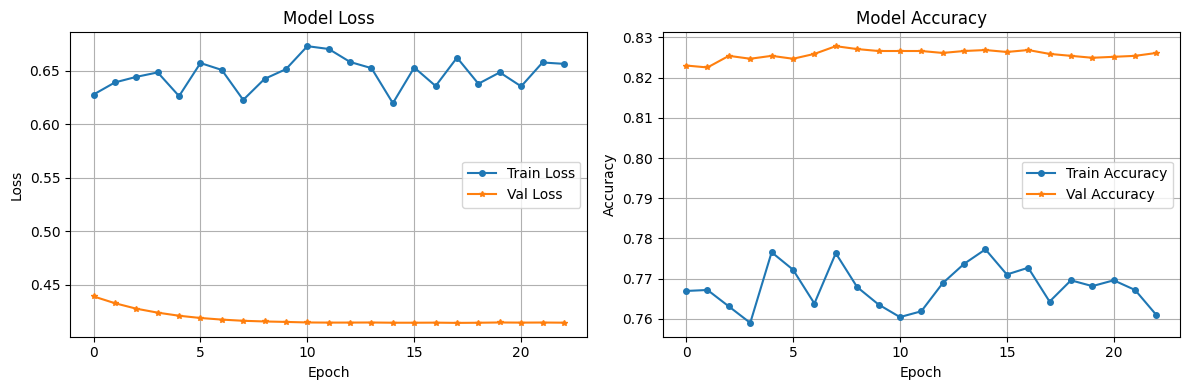

(63822, 4, 14, 1) (63822,) (4153, 4, 14, 1) (4153,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): 0.48%
	 ===>  Positive - (Indicates that the performance have improved)
Dataset 17/18 - Session Exp_2025-06-24-v4/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.4495, Acc: 82.17999999999999%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 78.14%
Maximum validation accuracy : 82.76%


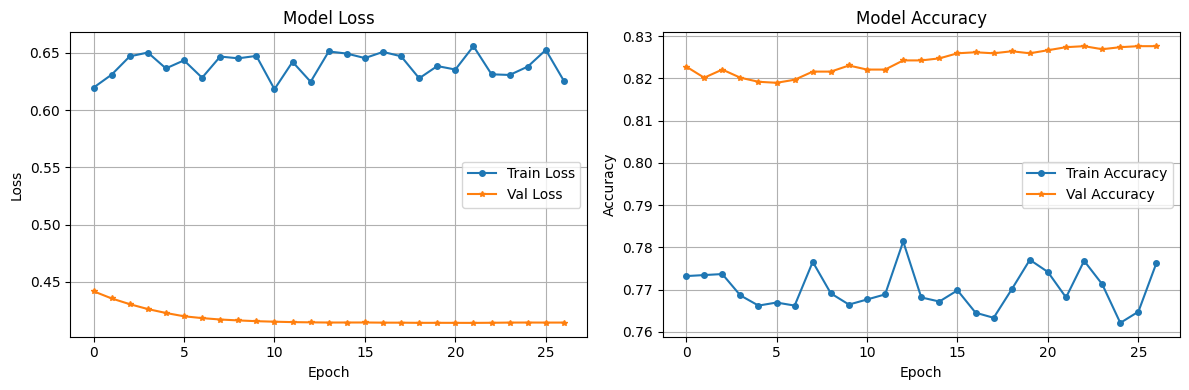

(67975, 4, 14, 1) (67975,) (4153, 4, 14, 1) (4153,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): 0.58%
	 ===>  Positive - (Indicates that the performance have improved)
Dataset 18/18 - Session Exp_2025-06-24-v4/E9AD0E7DCC2B/


 Unseen session performance
Loss: 0.4655, Acc: 81.47999999999999%

 After adaptation (Transfer learning with small samples)
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 78.21%
Maximum validation accuracy : 81.65%


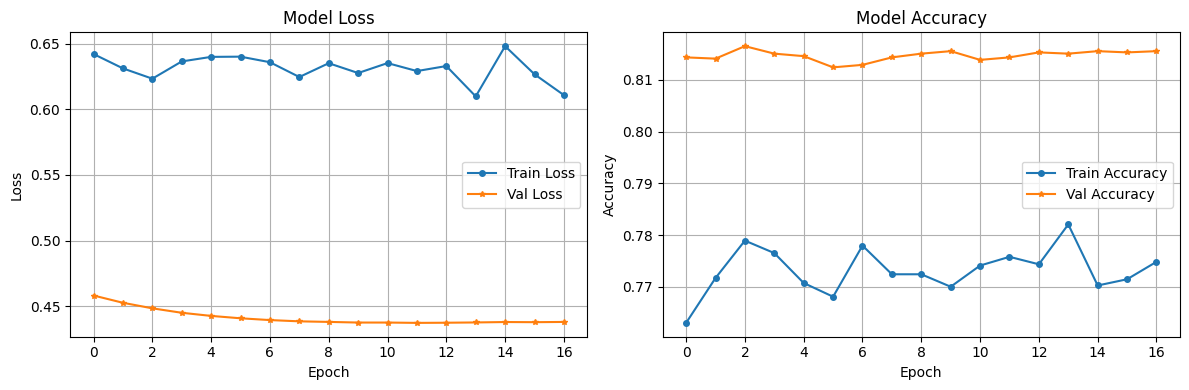

(72128, 4, 14, 1) (72128,) (4153, 4, 14, 1) (4153,)
Accuracy Difference (Initial accuracy before training - max test accuracy after training): 0.17%
	 ===>  Positive - (Indicates that the performance have improved)


In [2]:
default_path = config.default_path
classes = config.classes
train_ratio = 0.5

Info = config.Info
dataset = config.dataset

Trained_acc_all, Prev_acc_all, Init_acc_all = [], [], []

set_epoch, set_batch_size = 50, 256 #Default to the matlab
Model_name = "TL_Model_no_increment"

for idx, sessions in enumerate(dataset):
    print(f"===========================================\nDataset {idx+1}/{len(dataset)} - Session {sessions}\n===========================================\n")
    path = default_path + sessions + 'raw/'
    if idx == 0:
        feature_set, labels = utils.get_dataset(path, classes, show_labels=False)
        X_train, y_train, X_test, y_test = utils.split_data(feature_set, labels, ratio=train_ratio)
        model = Model.Original_model_V1(X_train.shape[1:])
        history, model = Model.Train_model(model, X_train, y_train, X_test, y_test, set_epoch, set_batch_size, Model_name,
                                            set_verbose=0,
                                            save_model_set=True)

        acc = model.evaluate(X_test, y_test, verbose=0)[1]
        Trained_acc_all, Prev_acc_all, Init_acc_all = [acc], [acc], [0.2]
        X_test_prev_all, y_test_prev_all = X_test, y_test


    else:
        init_model = load_model(f'{Model_name}.keras')  ###Initialize
        test_accs, X_test_prev_all, y_test_prev_all = adaptation_transfer_learning_with_small_samples(path, classes,
                                                                                               init_model, set_epoch, set_batch_size,
                                                                                                X_test_prev_all, y_test_prev_all, Model_name,
                                                                                                train_ratio=train_ratio,
                                                                                                set_verbose=False,
                                                                                                save_model_set=False,
                                                                                                show_class_distribution=False)
        Init_acc_all.append(test_accs[0])
        Prev_acc_all.append(test_accs[1])
        Trained_acc_all.append(test_accs[2])
        del init_model

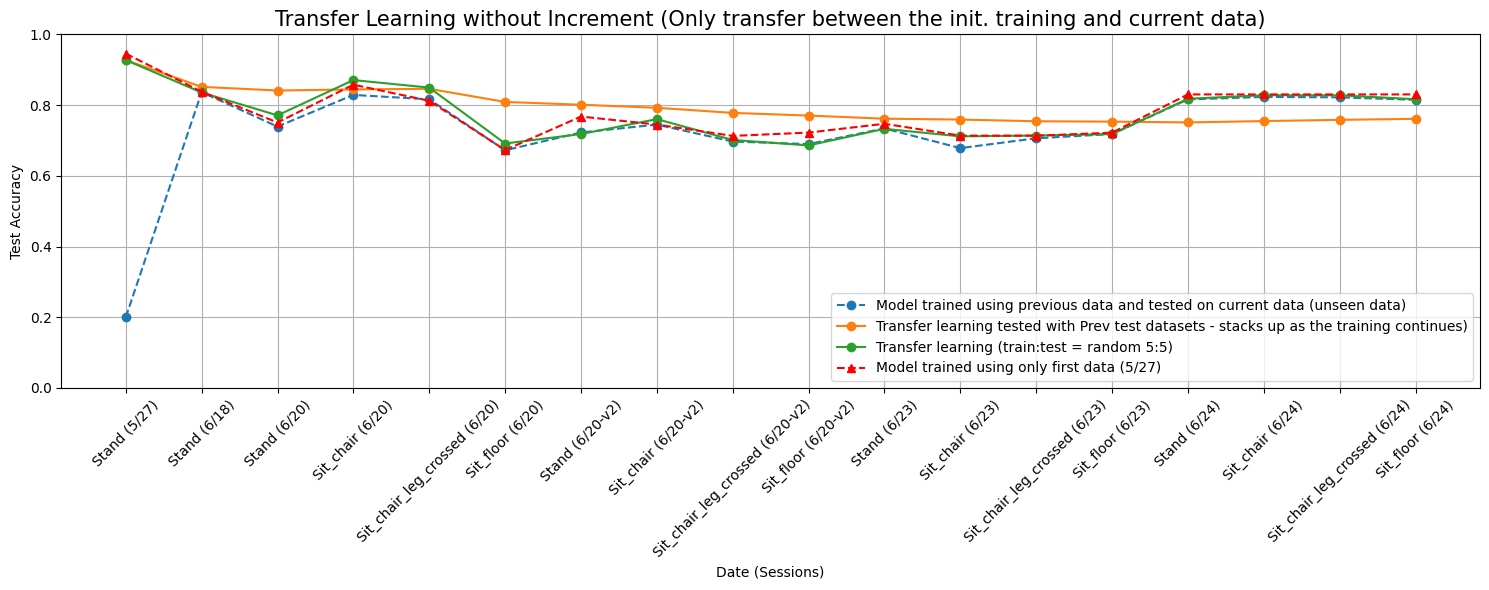

In [4]:
baseline = pd.read_csv('C:/Users/hml76/PycharmProjects/Tremor_project_local/Mindforce/Baseline_results.csv')

plt.figure(figsize=(15, 6))
plt.title('Transfer Learning without Increment (Only transfer between the init. training and current data)', fontsize=15)
plt.plot(Info, Init_acc_all, marker='o', label='Model trained using previous data and tested on current data (unseen data)', linestyle='--')
plt.plot(Info, Prev_acc_all, marker='o', label='Transfer learning tested with Prev test datasets - stacks up as the training continues)')
plt.plot(Info, Trained_acc_all, marker='o', label='Transfer learning (train:test = random 5:5)')
plt.plot(Info, baseline['Accuracy']/100, marker='^', label='Model trained using only first data (5/27)', color='red', linestyle='--')
plt.ylim([0, 1])

plt.xlabel('Date (Sessions)')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
for x in [Init_acc_all, Prev_acc_all, Trained_acc_all]:
    print(f"{np.mean(x)*100:.2f}%")


72.55%
79.52%
77.64%
